In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] =14,8
RANDOM_SEED=42
LABELS=['Normal','Fraud']

In [2]:
card=pd.read_csv("C:/Users/mansi/OneDrive/Documents/CAPSTONE_PROJECT_DATASETS/2_Credit_card_fraud_detection_PR2_BIA/creditcard.csv")

In [3]:
card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
card.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
card.duplicated().sum()

1081

In [6]:
card.drop_duplicates(inplace=True)

In [7]:
card.duplicated().sum()

0

In [8]:
card.isnull().sum().sum()

0

In [9]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


C:\Users\mansi\AppData\Local\Temp\ipykernel_15820\2037289448.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  card.hist(ax=fig)


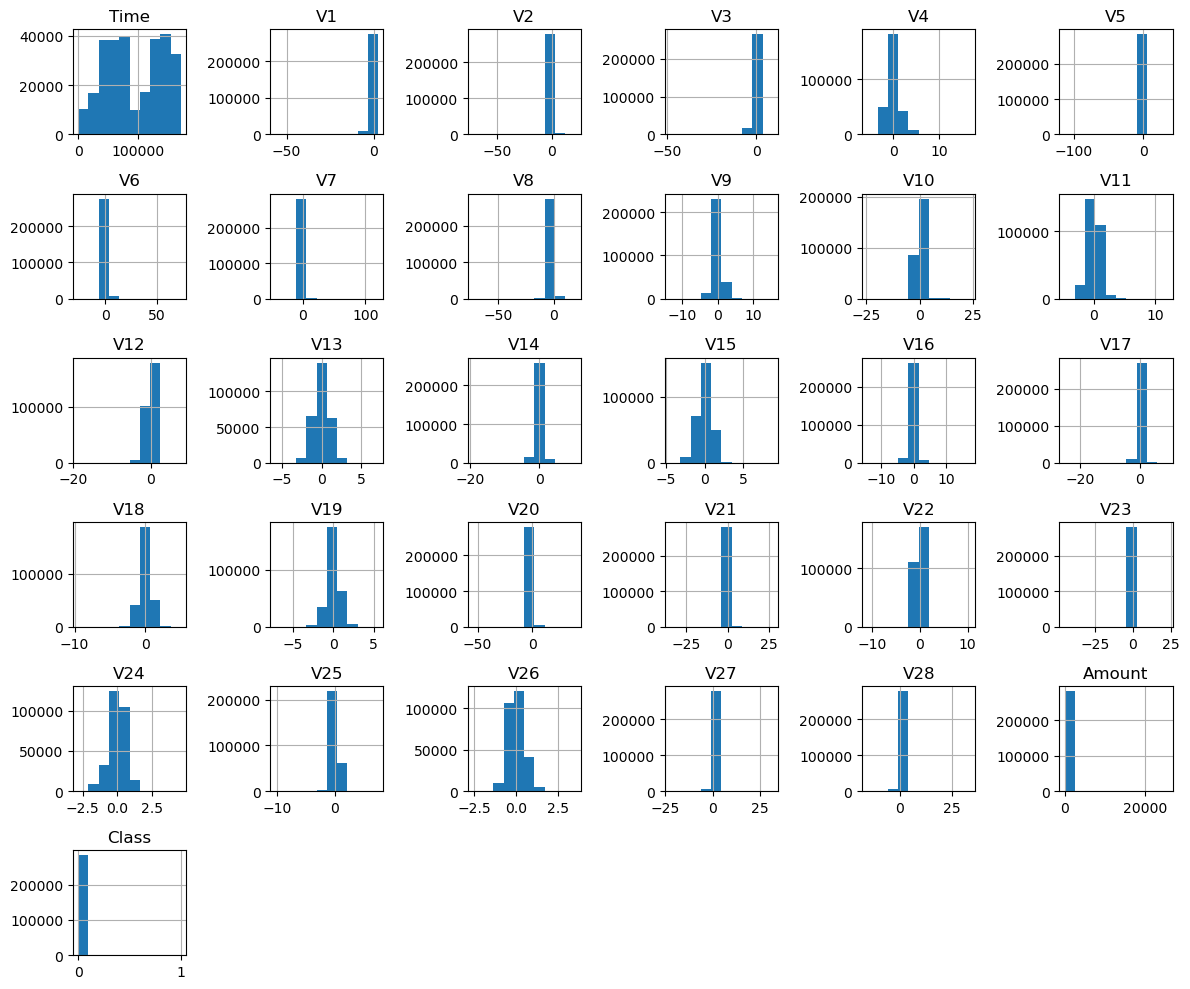

In [10]:
fig = plt.figure(figsize=(12,10))
card.hist(ax=fig)
plt.tight_layout()

In [11]:
#sns.pairplot(card,hue='Class',palette='bright')

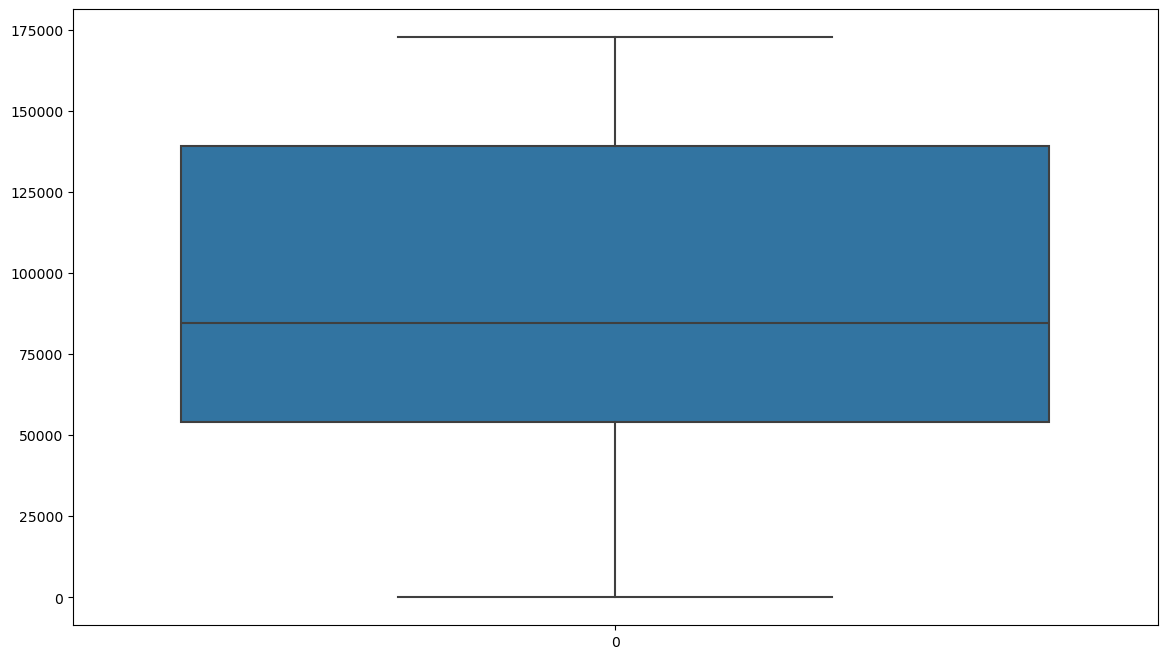

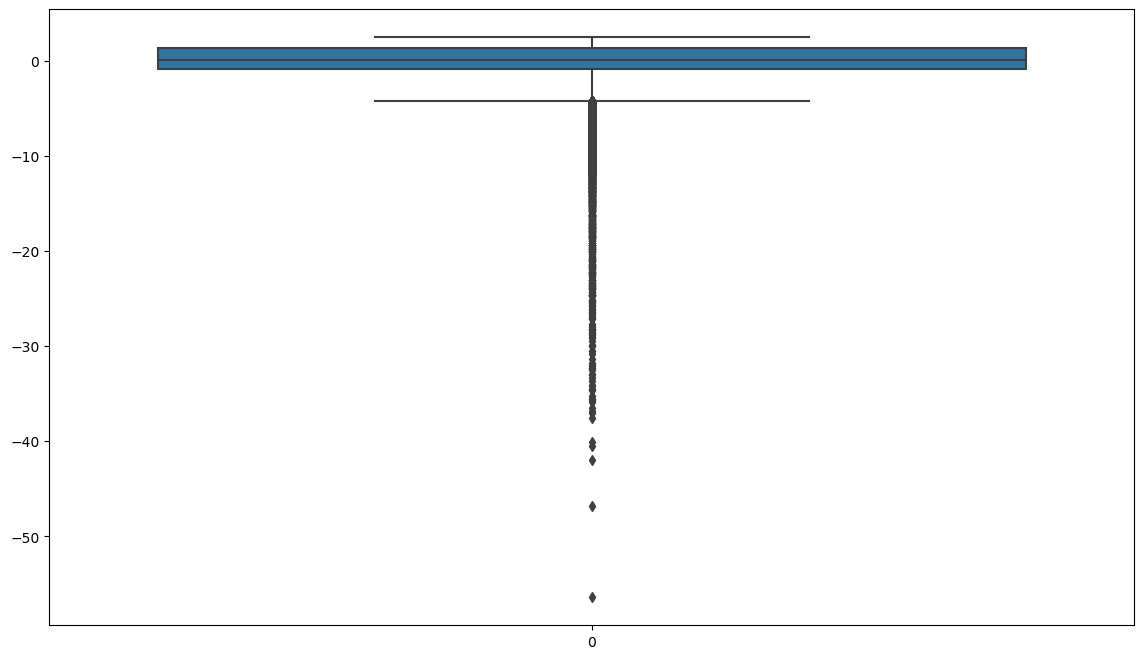

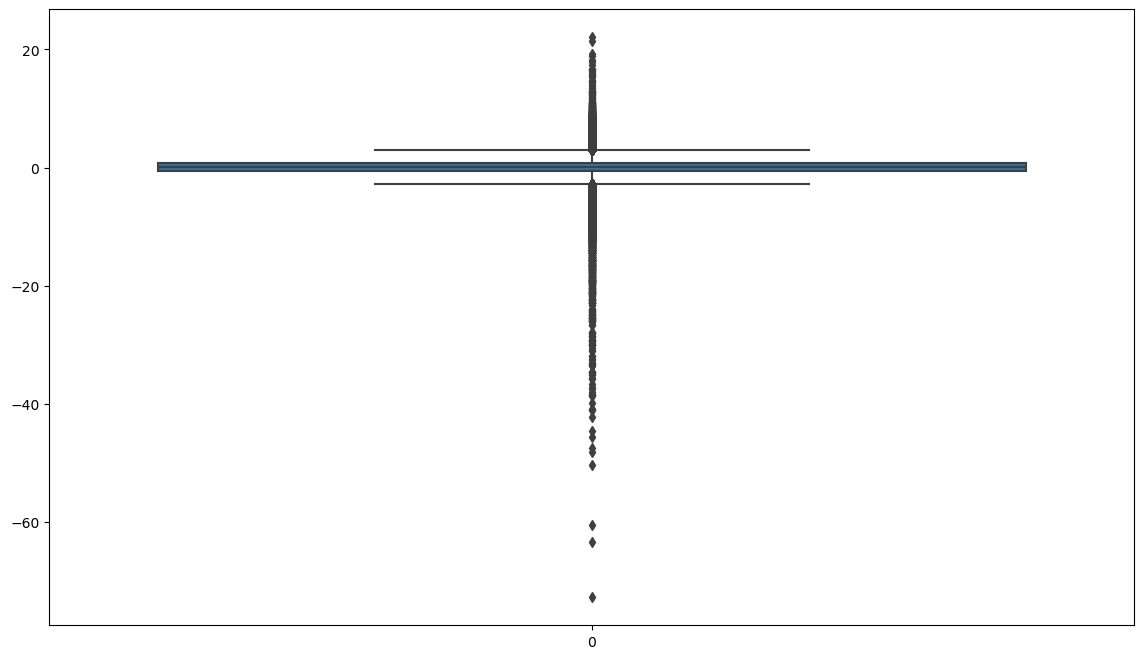

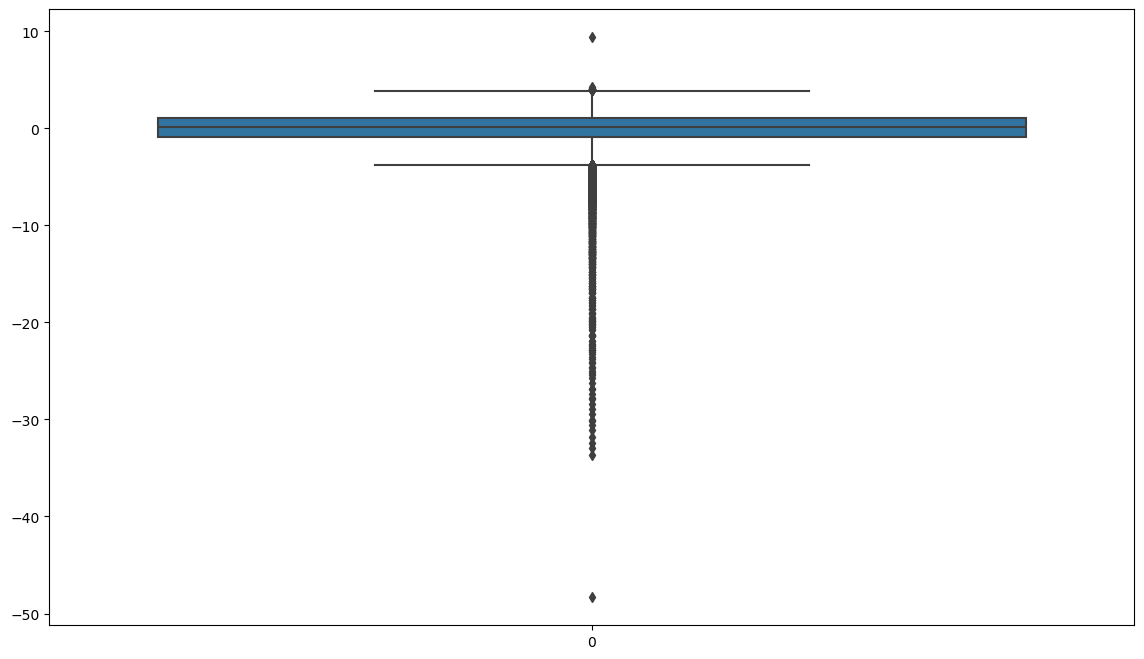

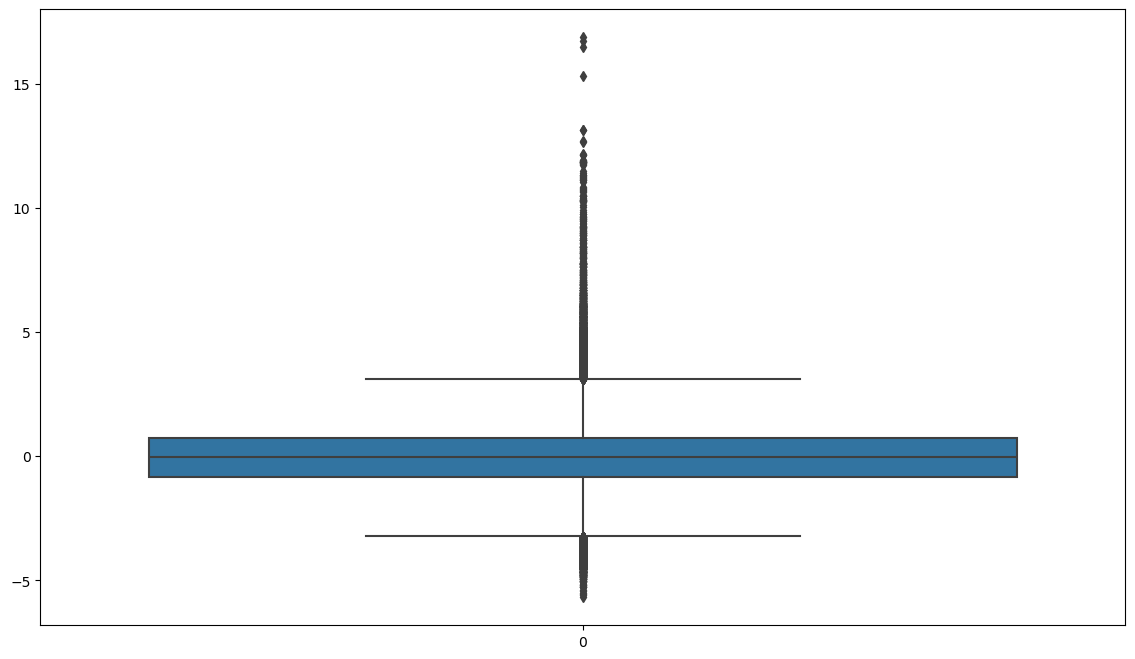

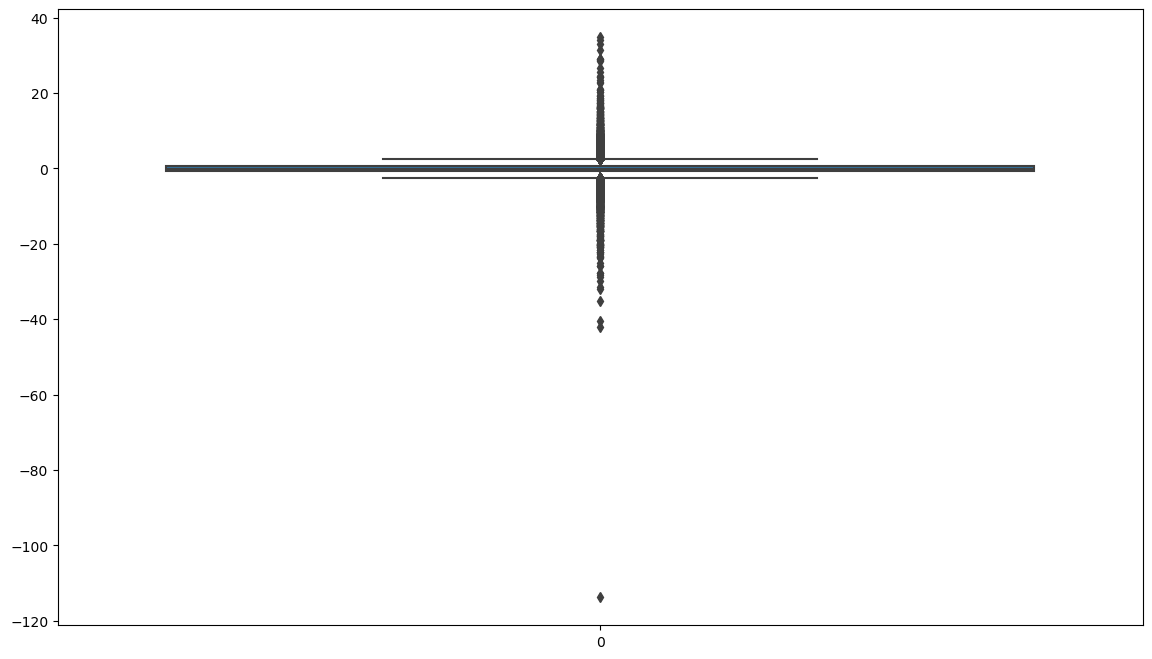

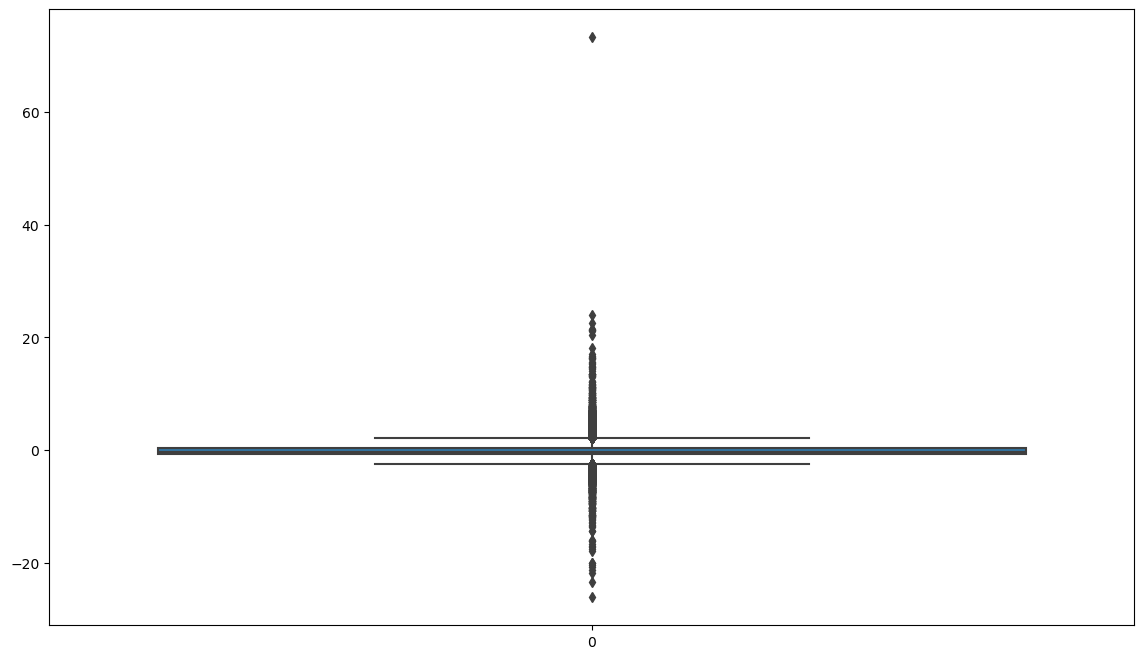

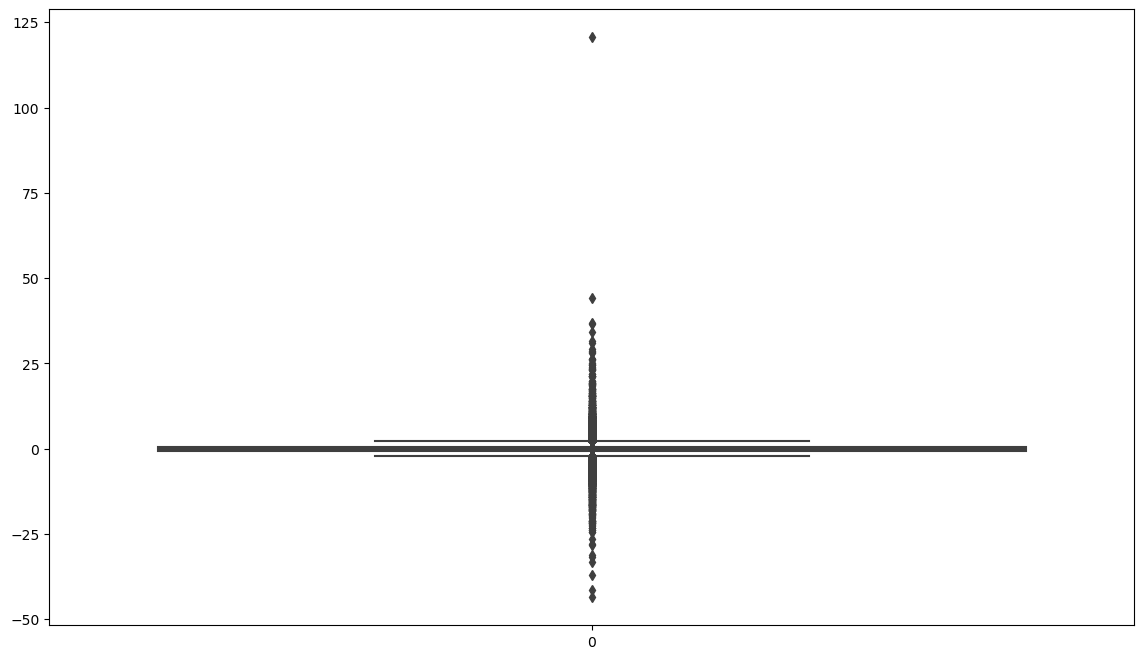

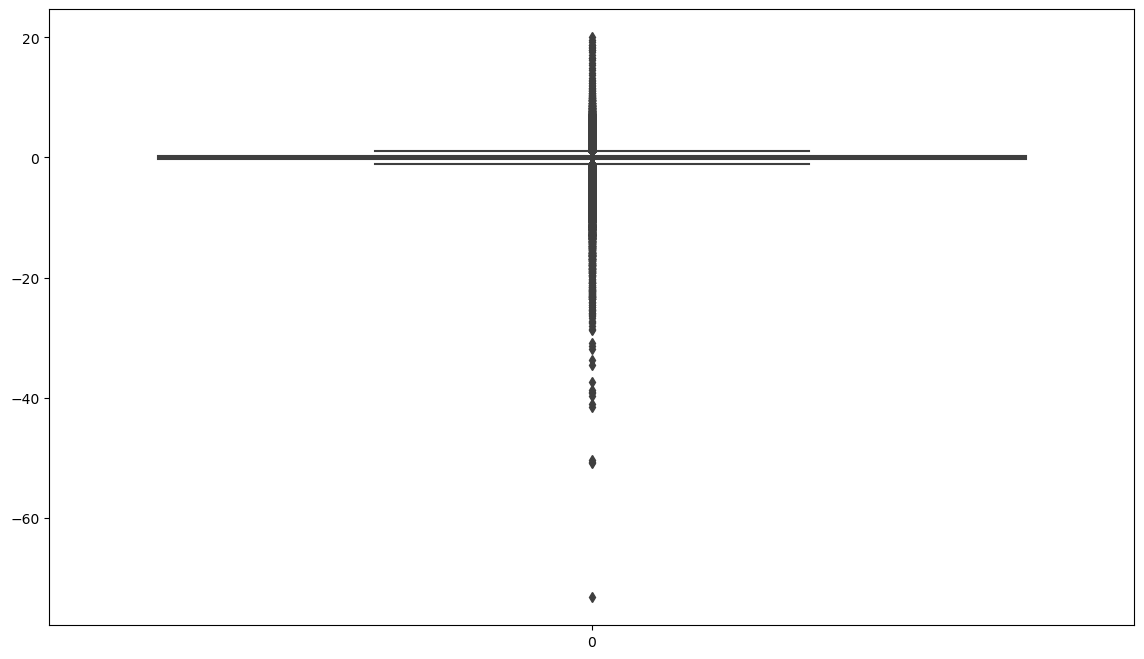

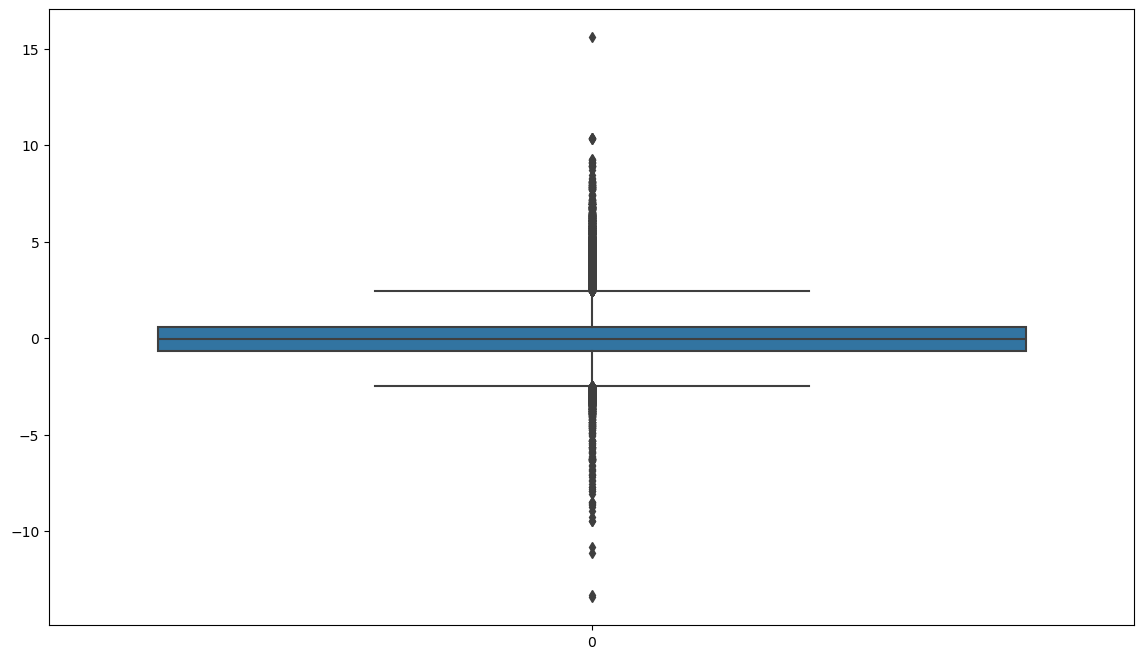

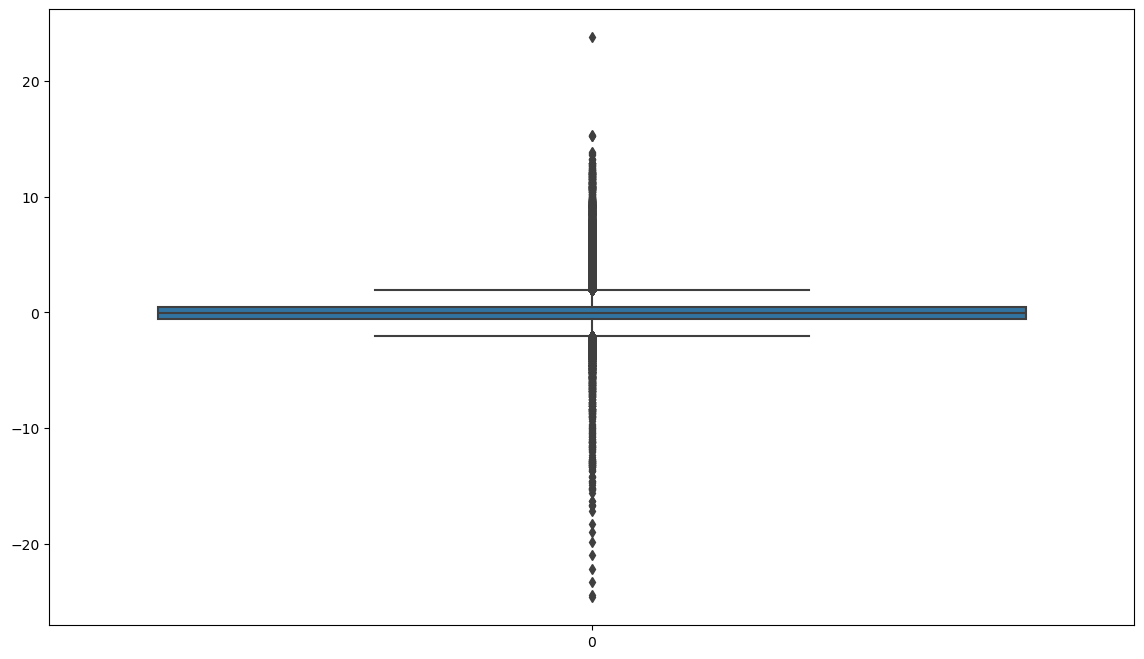

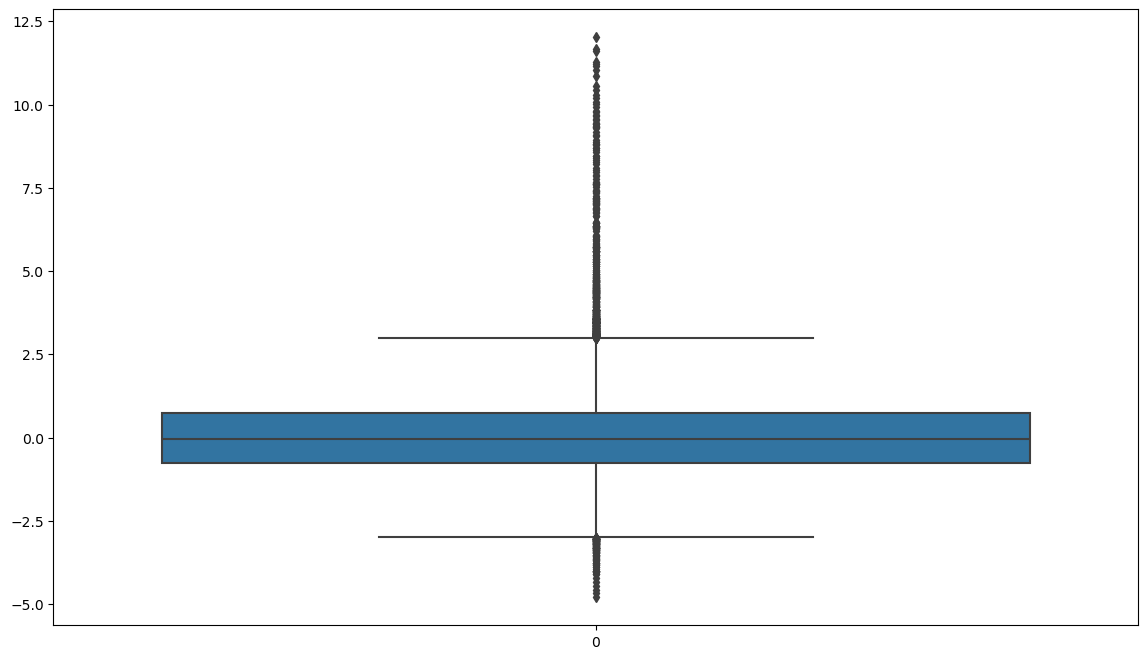

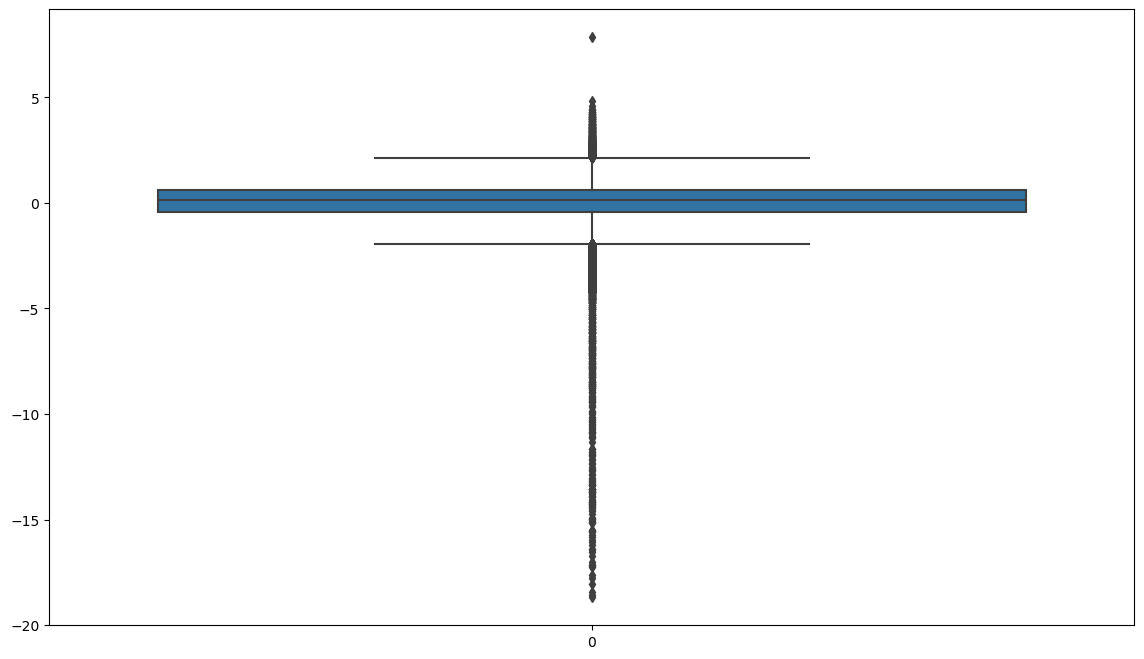

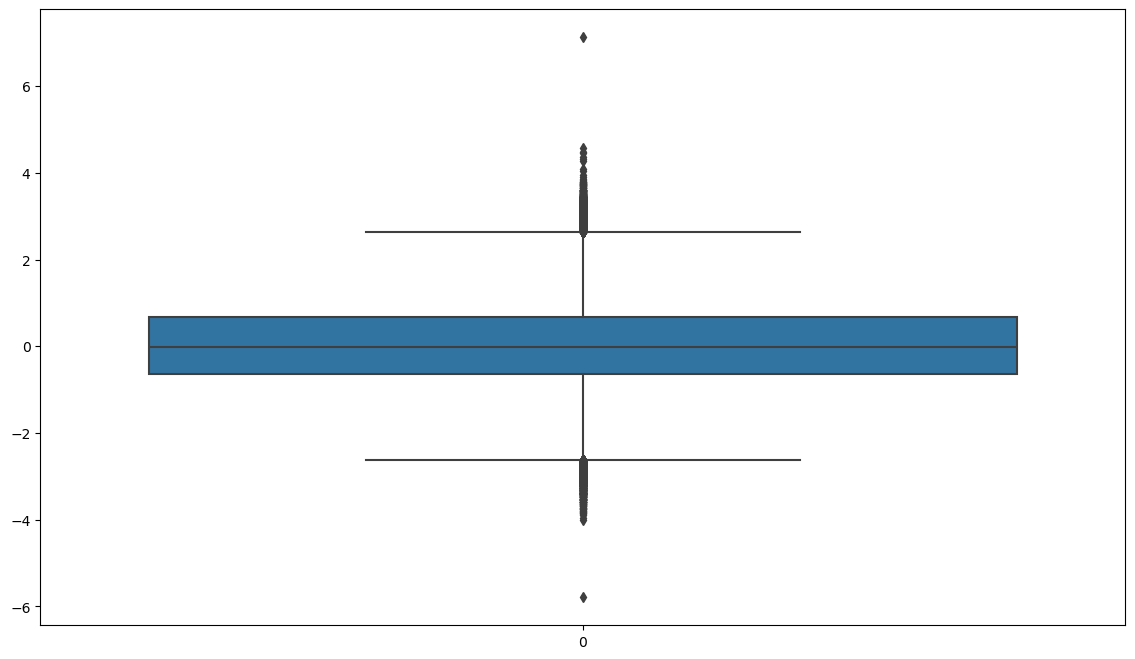

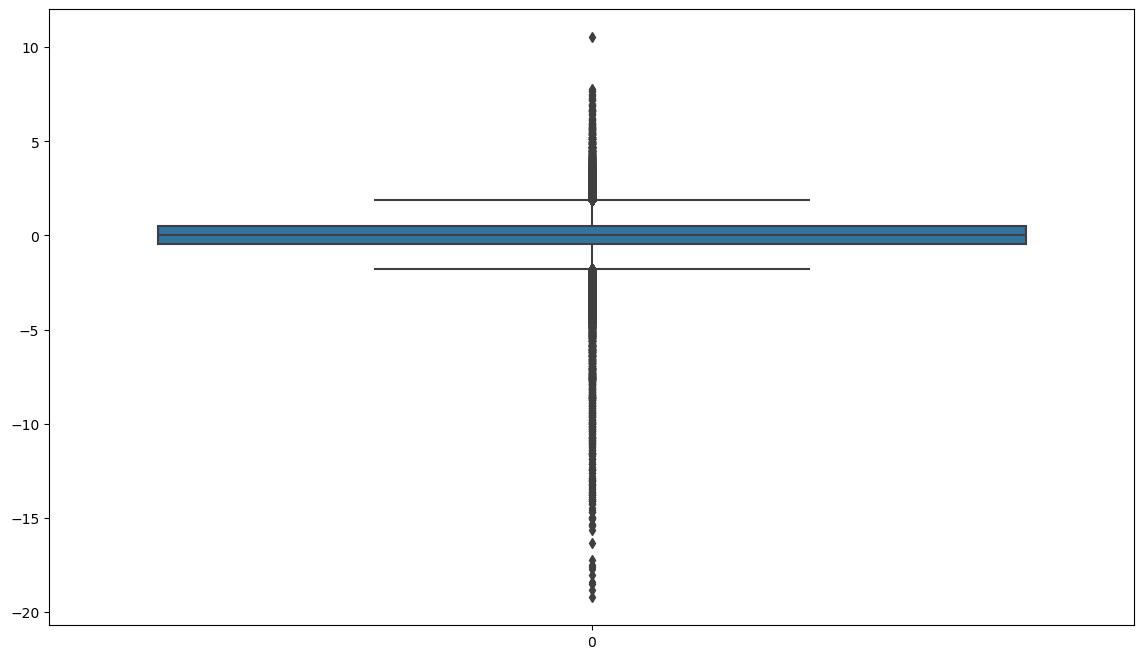

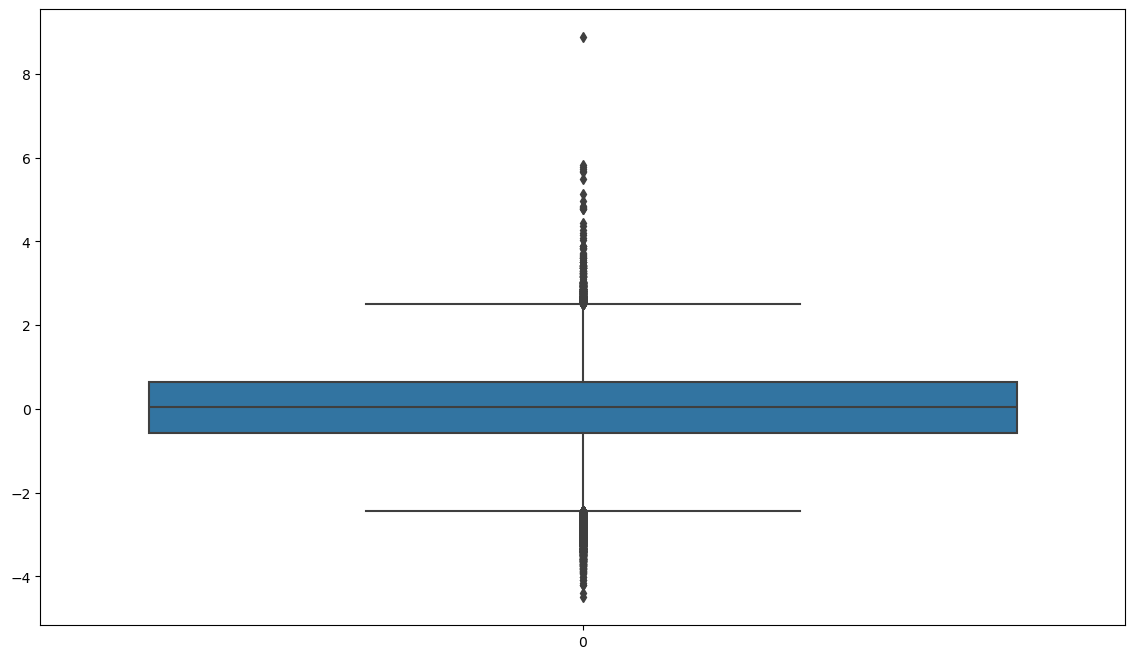

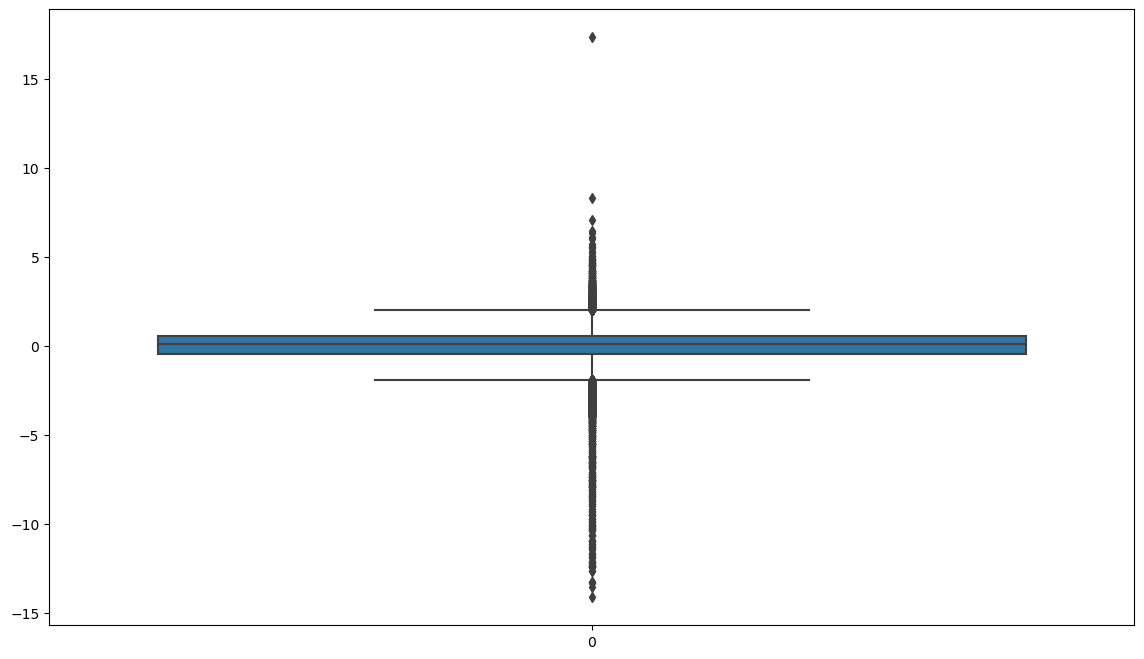

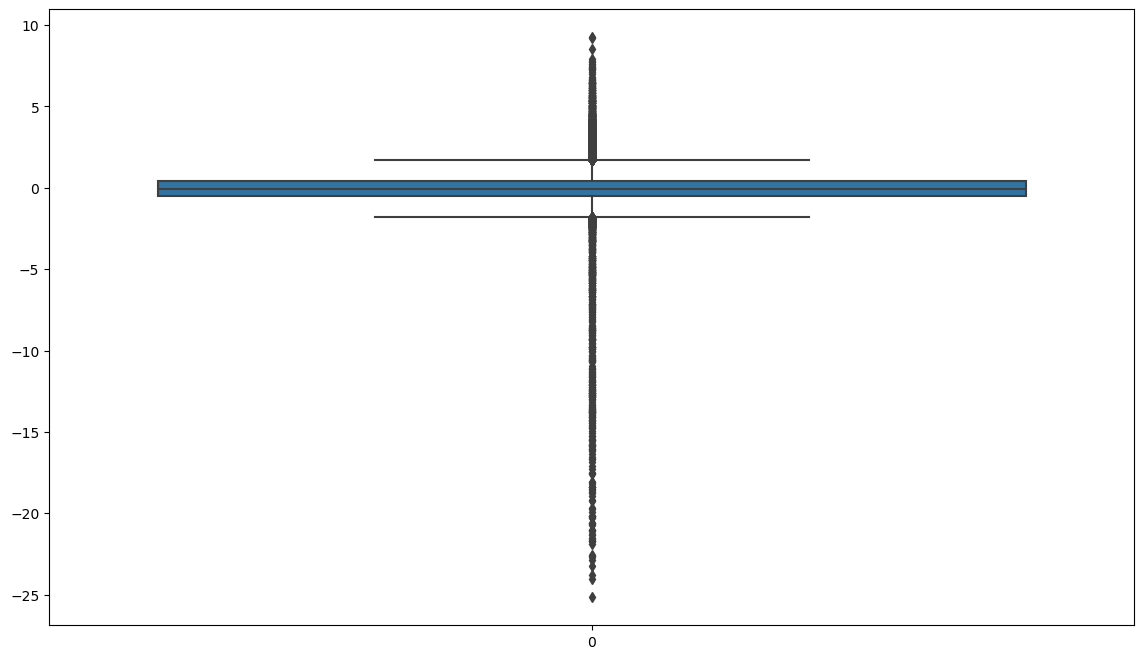

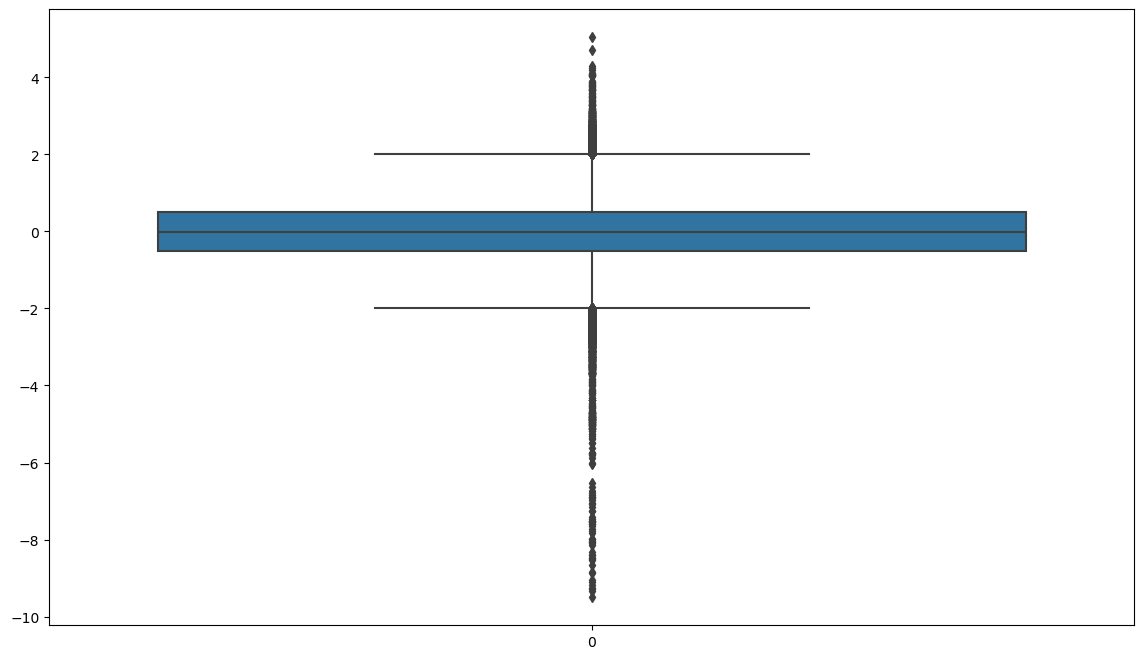

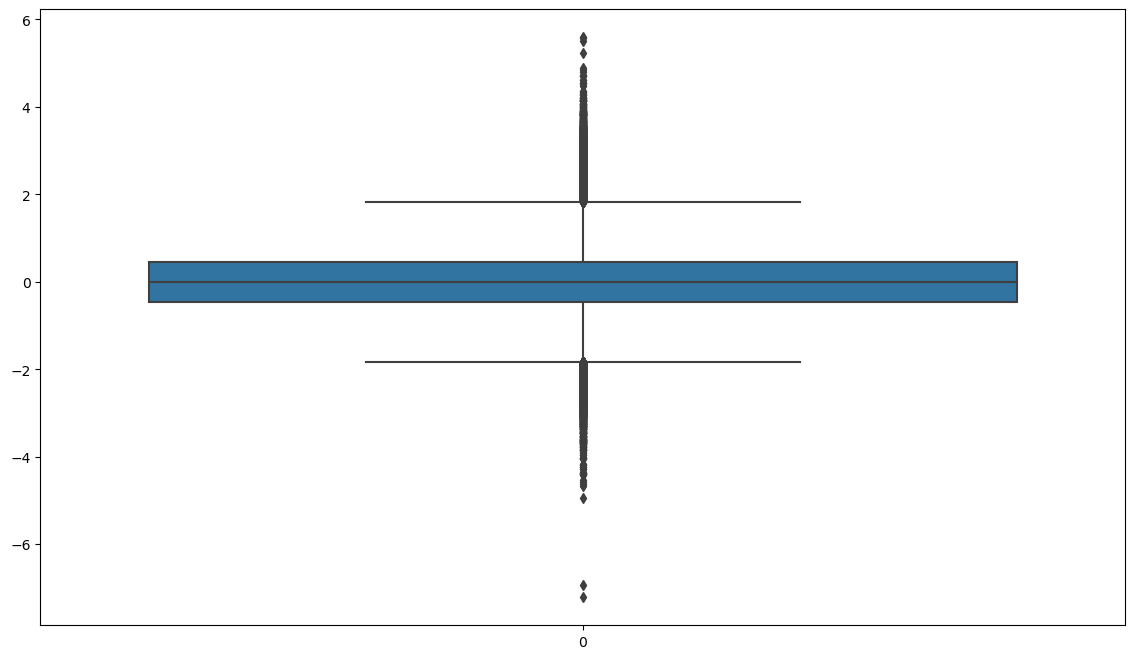

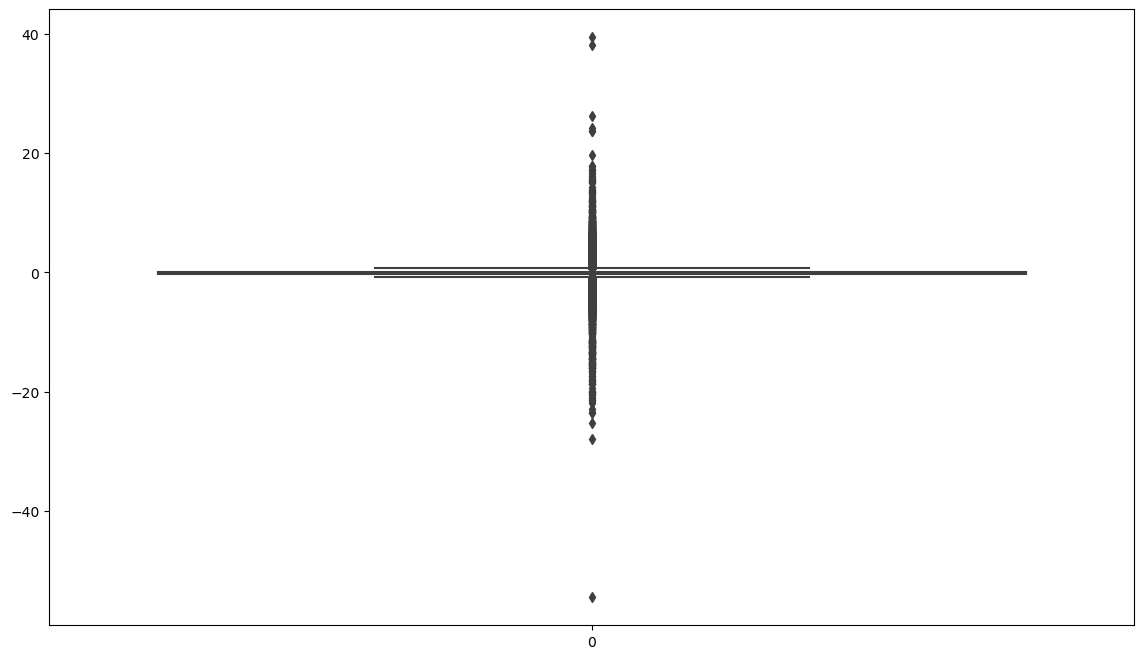

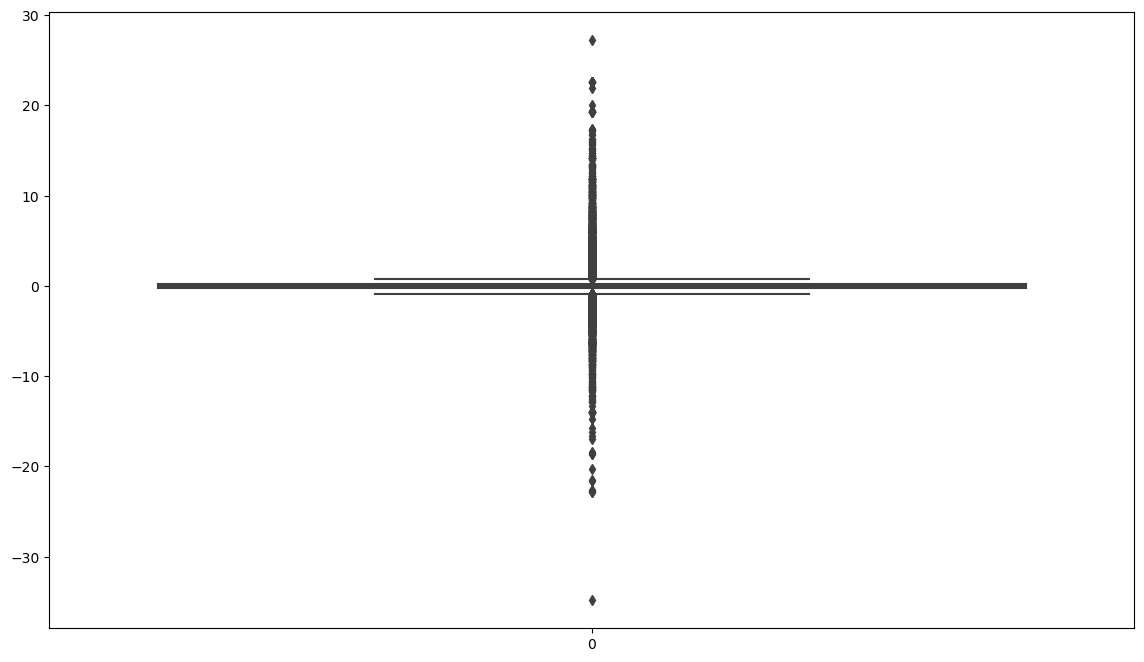

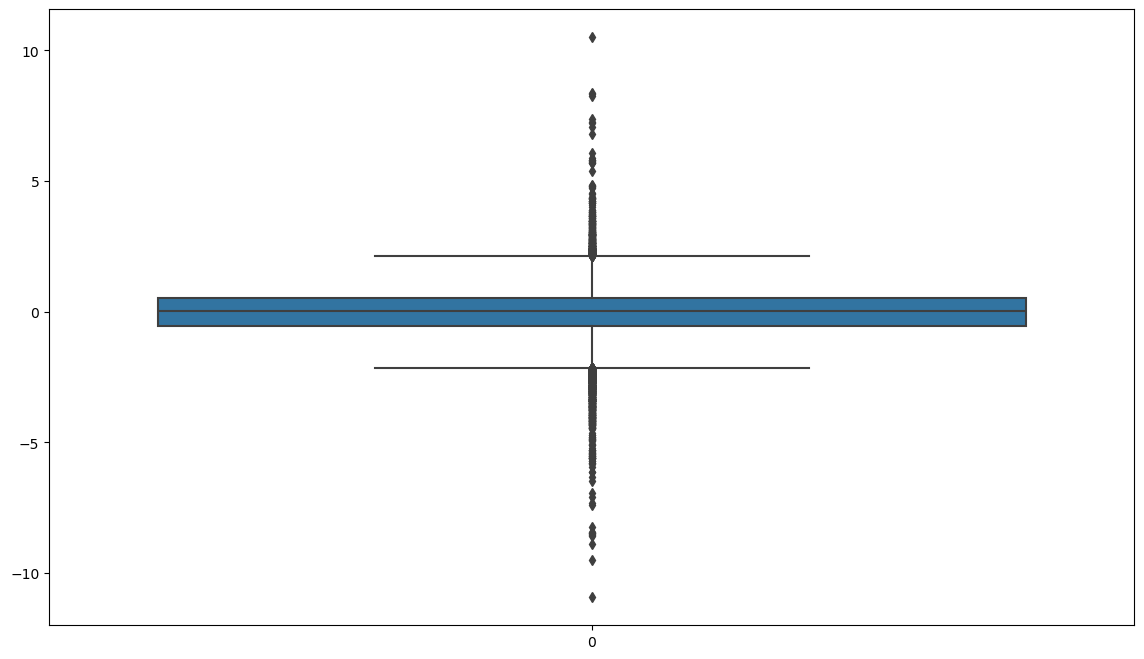

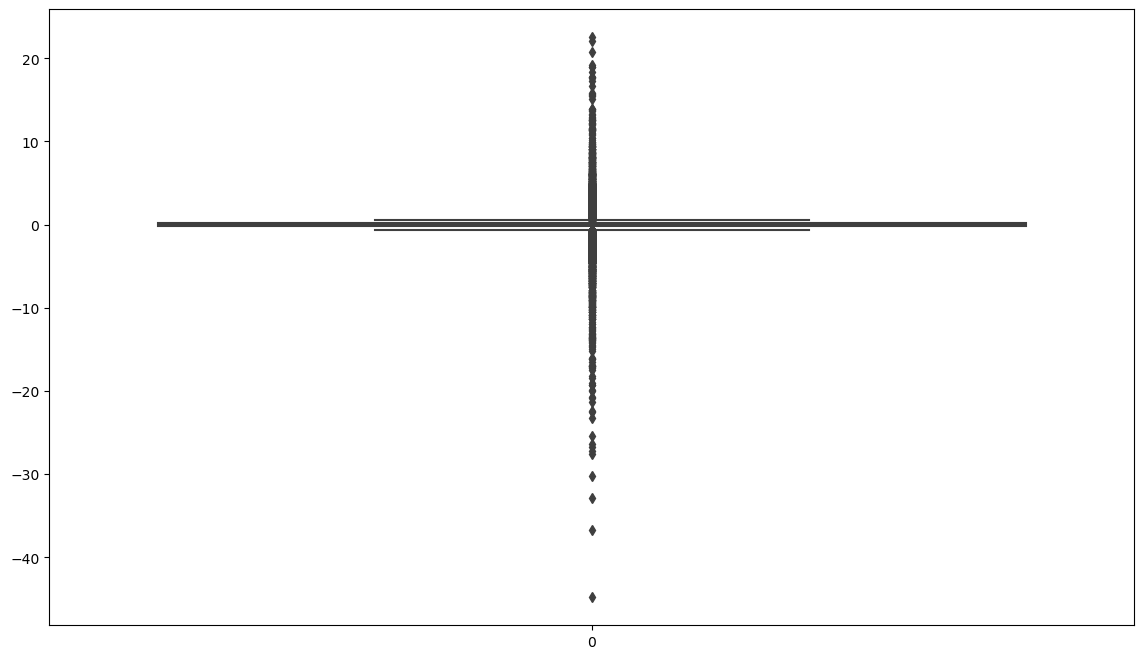

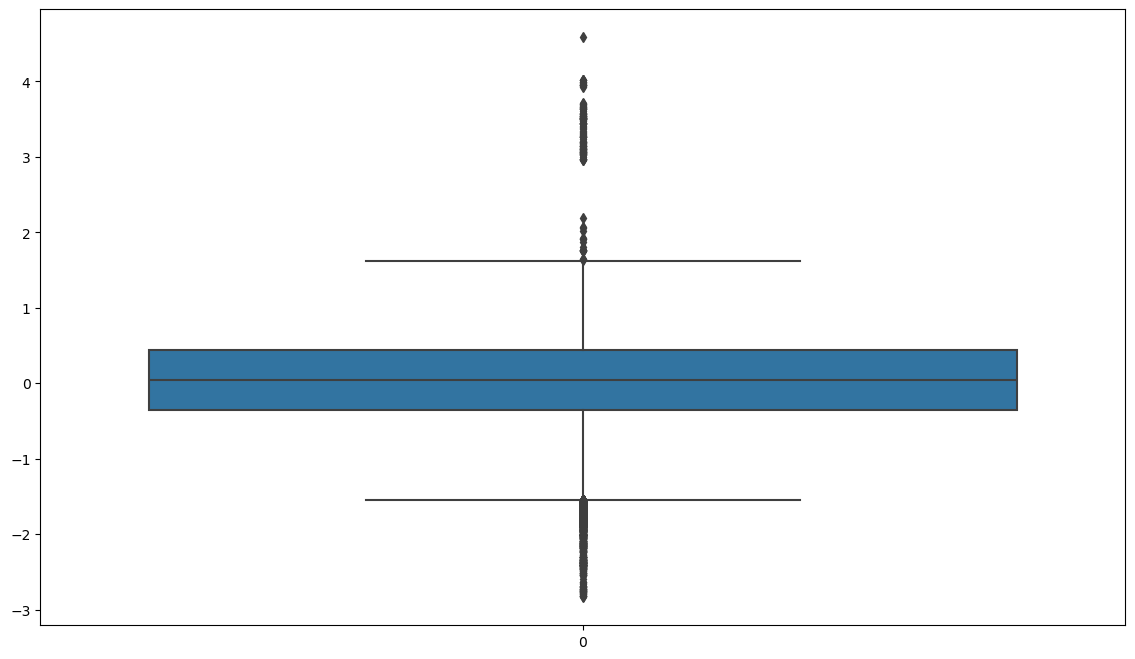

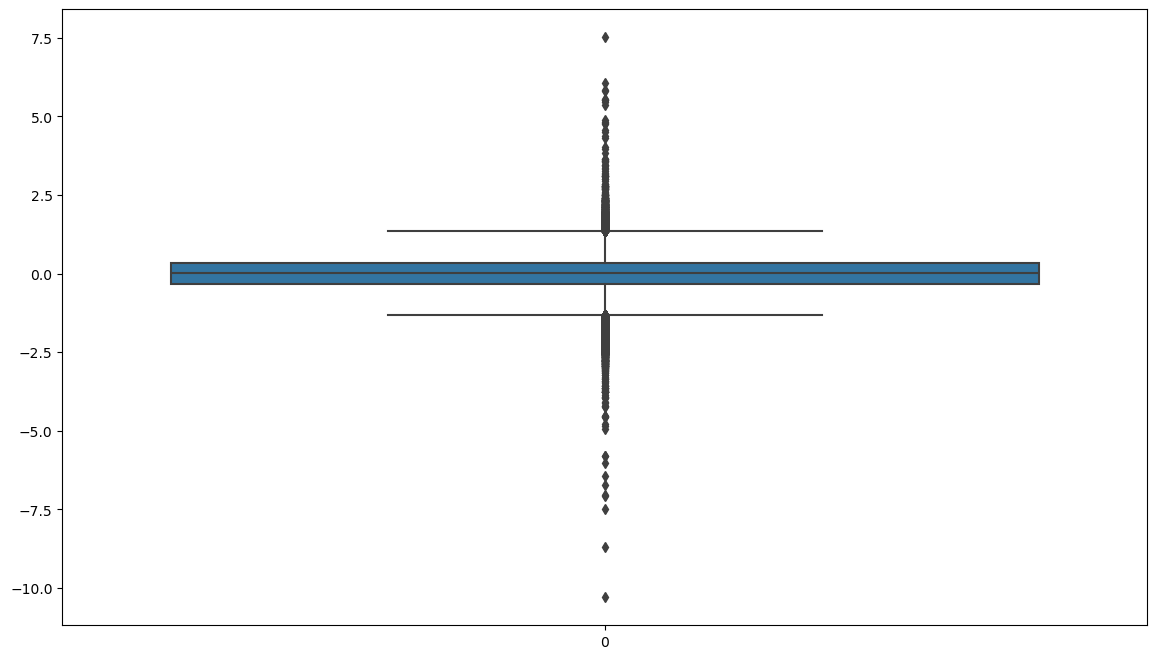

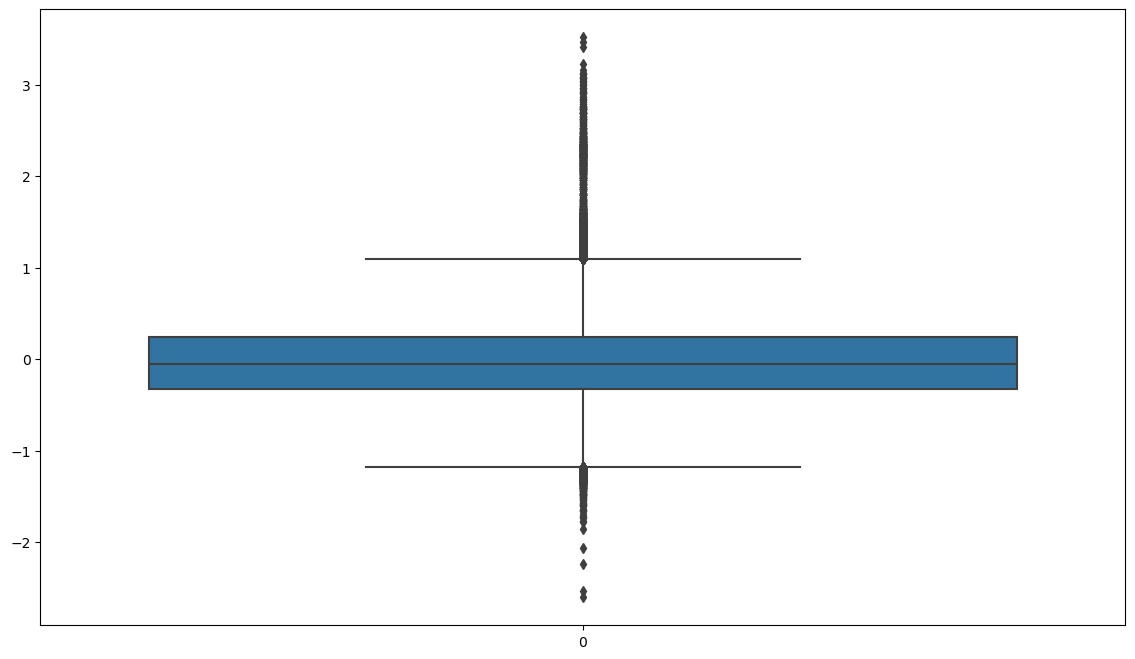

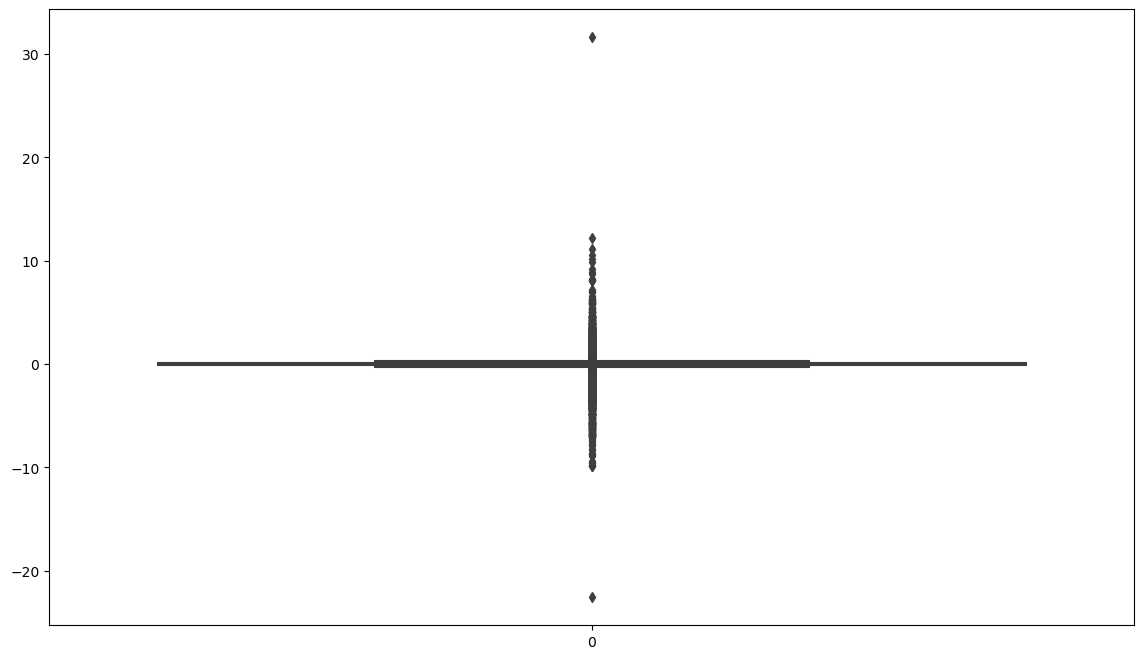

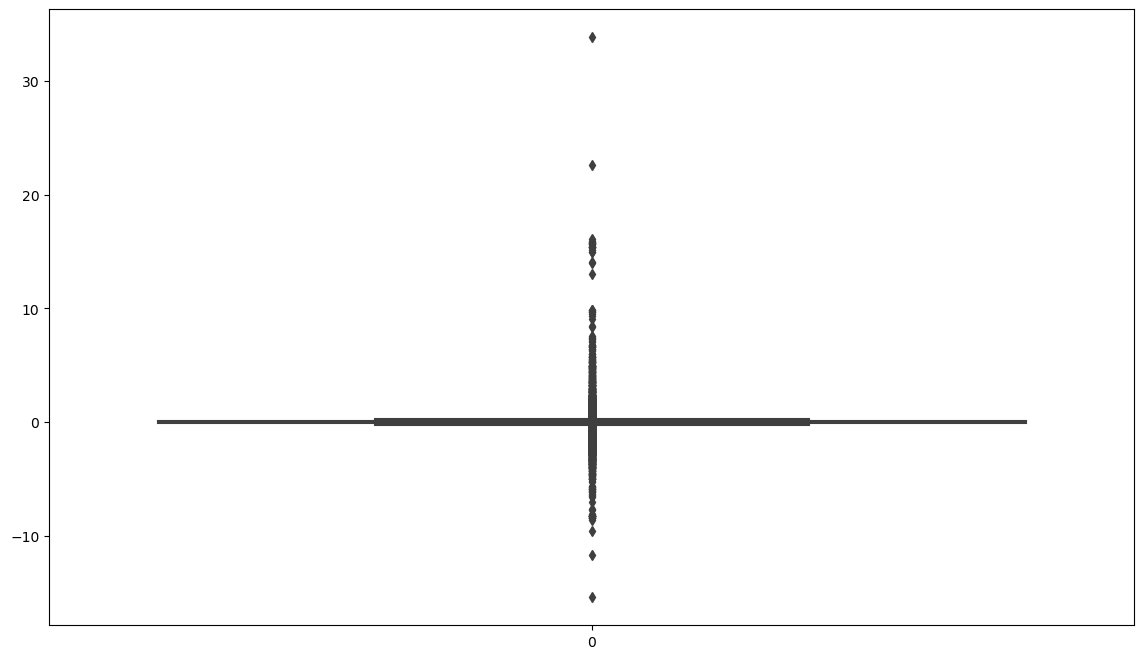

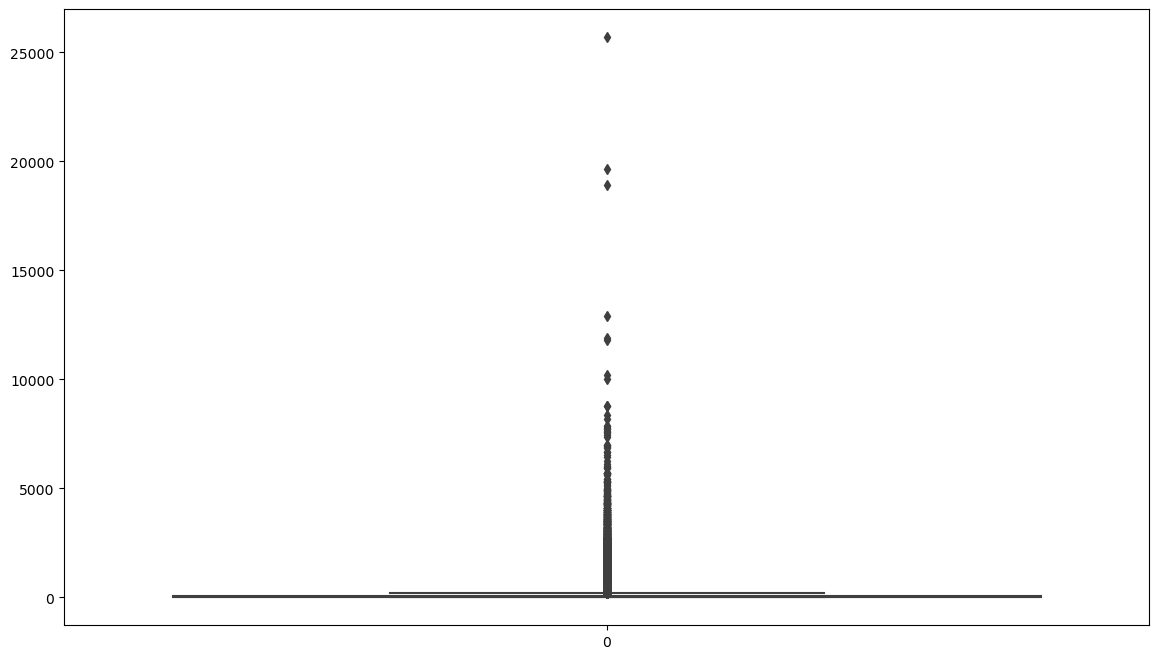

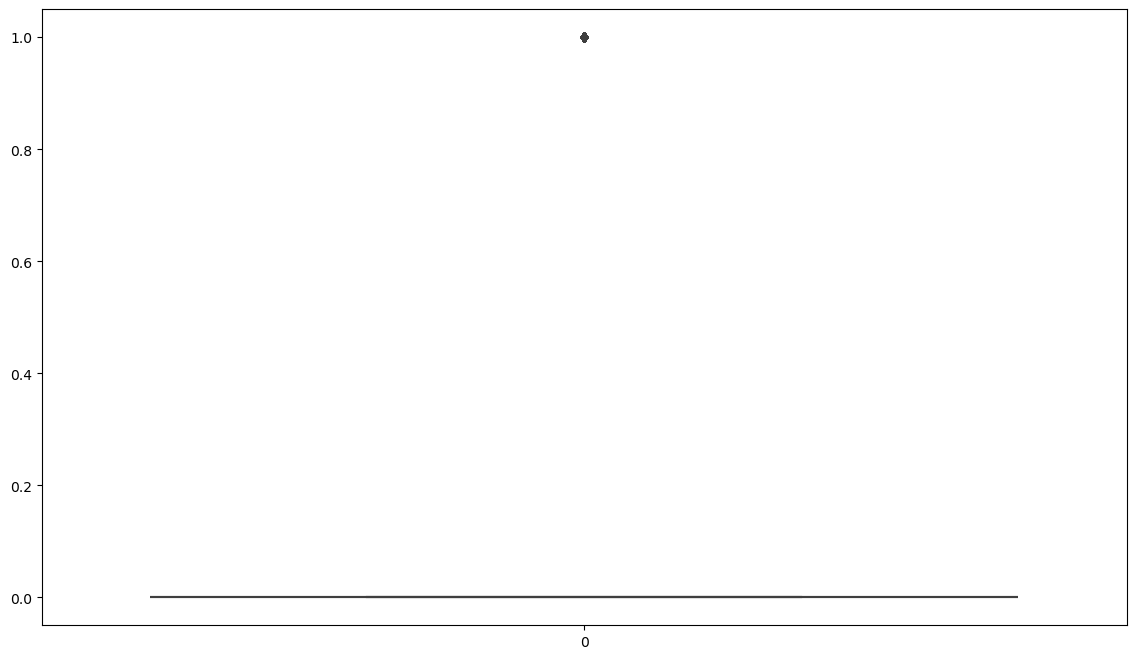

In [12]:
for i in card.select_dtypes(include='number').columns.values:
    sns.boxplot(card[i])
    plt.show()

In [13]:
card['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

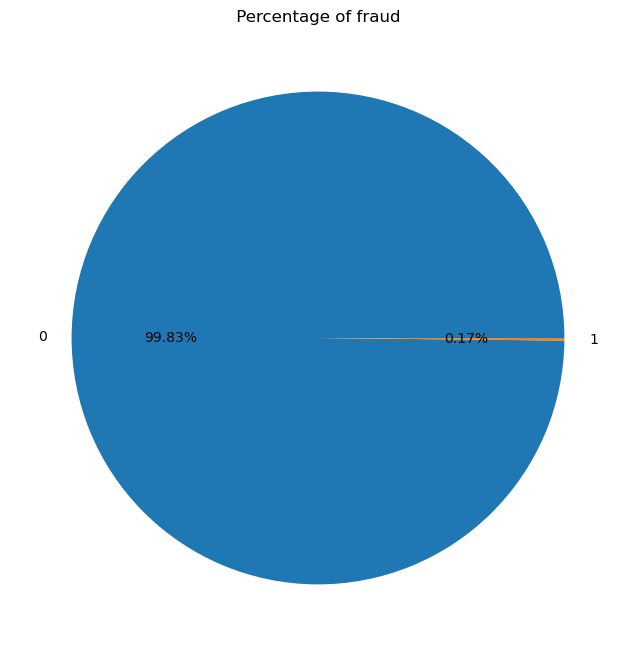

In [14]:
class_index=card.Class.value_counts().index
class_value=card.Class.value_counts().values
plt.pie(class_value,labels=class_index,autopct="%1.2f%%")
plt.title(' Percentage of fraud ')
plt.show()

In [15]:
data=card.copy()

In [16]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
x=data.drop('Class',axis=1)

In [18]:
y=data['Class']

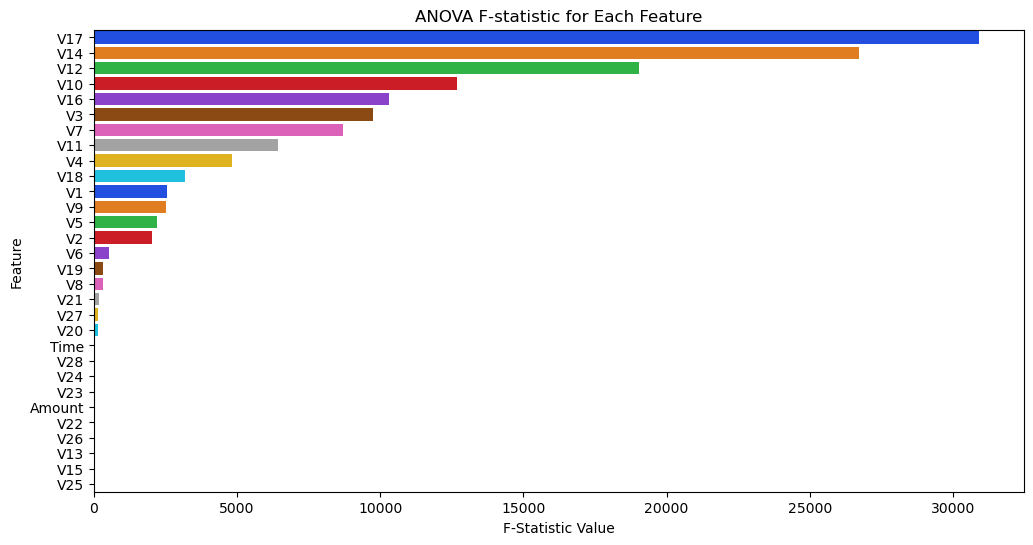

In [19]:
from sklearn.feature_selection import f_classif
f_statistic, p_values = f_classif(x, y)
feature_stats = pd.DataFrame({'Feature': x.columns, 'F_Statistic': f_statistic, 'P_Value': p_values})
feature_stats = feature_stats.sort_values(by='F_Statistic', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='F_Statistic', y='Feature', data=feature_stats, palette='bright')
plt.title('ANOVA F-statistic for Each Feature')
plt.xlabel('F-Statistic Value')
plt.ylabel('Feature')
plt.show()

In [20]:
x = data.drop(['V21','V27','V20','Time','V28','V24','V23','Amount','V22','V26','V13','V15','V25','Class'], axis=1)

In [21]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state = 20)

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)
from collections import Counter
print("Before SMOTE",Counter(Y_train))
print("After SMOTE",Counter(Y_train_smote))

Before SMOTE Counter({0: 226604, 1: 376})
After SMOTE Counter({0: 226604, 1: 226604})


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=1000, random_state=42)
logistic.fit(X_train_smote,Y_train_smote)
Y_pred_test=logistic.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_test)
print("Accuracy Score:", accuracy)
cm = confusion_matrix(Y_test, Y_pred_test)
print("Confusion Matrix:")
print(cm)
report = classification_report(Y_test, Y_pred_test)
print("Classification Report:")
print(report)

Accuracy Score: 0.9711345293060304
Confusion Matrix:
[[55019  1630]
 [    8    89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56649
           1       0.05      0.92      0.10        97

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=42)
dt.fit(X_train_smote,Y_train_smote)
Y_pred_test=dt.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_test)
print("Accuracy Score:", accuracy)
cm = confusion_matrix(Y_test, Y_pred_test)
print("Confusion Matrix:")
print(cm)
report = classification_report(Y_test, Y_pred_test)
print("Classification Report:")
print(report)

Accuracy Score: 0.9974095090402848
Confusion Matrix:
[[56521   128]
 [   19    78]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.38      0.80      0.51        97

    accuracy                           1.00     56746
   macro avg       0.69      0.90      0.76     56746
weighted avg       1.00      1.00      1.00     56746



In [27]:
data.loc[0]

Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64

In [29]:
import pickle
# Save the trained model to a file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

In [30]:
# Load the saved model from the file
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [40]:
input = (-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698, 0.363787, 0.090794,-0.551600,-0.617801,-0.311169, -0.470401,0.207971,0.025791,0.403993,)
np_array = np.asarray(input)
ip_reshaped=np_array.reshape(1,-1)
prediction=dt.predict(ip_reshaped)
print(prediction)
if(prediction[0]==0):
  print('Fraudulent credit card transactions not occurred')
else:
  print("Had fraudulent credit card transactions ")

[0]
Fraudulent credit card transactions not occurred


C:\Users\mansi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
